<a href="https://colab.research.google.com/github/pdh93621/Deep-learning/blob/main/Mecab%26LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파일불러오기 + 정제

In [1]:
import pandas as pd
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [3]:
! bash install_mecab-ko_on_colab190912.sh
from konlpy.tag import Mecab

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 450kB 29.3MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-16 13:37:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=rZBd4AWkgzgUDywUlmE%2FuC66oAQ%3D&Expires=1623851859&AWSAccessKeyId=AKIA6KOSE3BN

In [4]:
csv_path = '/content/drive/MyDrive/dataset/news_data.csv'
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [5]:
df['news'] = df['news'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

In [6]:
df

,news,code
0,파주시청 사진제공 파주시 파주시청 사진제공 파주시 파주 파이낸셜뉴스 강근주 ...,사회
1,동영상 뉴스 이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다 서울 강남경찰서는 ...,사회
4,서울 연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 ...,사회
...,...,...
5244,신종 코로나바이러스 감염증 코로나 사태 이후 가정의 달 월에도 언택트 비...,IT/과학
5245,는 소비자로부터 월 이용료 만 만원을 받고 초고속 인터넷을 제공한다 그런 ...,IT/과학
5246,머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/과학
5247,가 오는 일 정식 출시하는 스마트폰 벨벳 이 사실상 공짜폰 이 될 전망이...,IT/과학


In [7]:
df = df.drop_duplicates('news')

In [8]:
import numpy as np

In [9]:
tokenizer = Mecab()
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [11]:
#토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #토큰화
    temp_data = tokenizer.morphs(sentence)
    #불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords]
    text_data.append(temp_data)
  text_data = list(map(' '.join, text_data))
  return text_data

text_data = preprocessing(df['news'])

In [97]:
max_len = max(len(l) for l in text_data)
print(f'샘플의 최대 길이 : {max_len}')

샘플의 최대 길이 : 17321
파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 파주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 파 주 시 이미 모든 시민 경기도 파주시 재난 기본소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월 일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포


In [17]:
#preprocessing으로 어차피 띄어쓰기 처리는 다 되있으니까 그냥 쓰기편한 tokenizer 쓰자
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(text_data)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기: %d' % vocab_size)
# 단어 집합의 크기가 누가봐도 크지만 일단 그냥 드랍 안하고 써보자

단어 집합의 크기: 36536


In [19]:
print(t.word_index)

{'를': 1, '고': 2, '으로': 3, '에서': 4, '로': 5, '도': 6, '일': 7, '해': 8, '적': 9, '것': 10, '와': 11, '인': 12, '기': 13, '만': 14, '게': 15, '코로나': 16, '지': 17, '년': 18, '습니다': 19, '되': 20, '며': 21, '한다': 22, '월': 23, '된': 24, '면': 25, '원': 26, '어': 27, '대': 28, '었': 29, '받': 30, '서울': 31, '않': 32, '까지': 33, '재': 34, '제공': 35, '됐': 36, '명': 37, '말': 38, '성': 39, '부터': 40, '자': 41, '겠': 42, '전': 43, '중': 44, '시': 45, '밝혔': 46, '사진': 47, '던': 48, '라고': 49, '배포': 50, '다고': 51, '위해': 52, '지원': 53, '화': 54, '아': 55, '면서': 56, '통해': 57, '시장': 58, '씨': 59, '지역': 60, '없': 61, '지만': 62, '된다': 63, '았': 64, '나': 65, '대한': 66, '그': 67, '진행': 68, '개': 69, '주': 70, '한국': 71, '보': 72, '권': 73, '다는': 74, '지난': 75, '사업': 76, '개발': 77, '억': 78, '기술': 79, '이번': 80, '도록': 81, '두': 82, '생활': 83, '방역': 84, '위한': 85, '거리': 86, '기업': 87, '내': 88, '국내': 89, '서비스': 90, '사회': 91, '경제': 92, '운영': 93, '더': 94, '제': 95, '관련': 96, '오': 97, '함께': 98, '같': 99, '안': 100, '문화': 101, '입니다': 102, '많': 103, '연구': 104, '가능': 105, '예정':

In [33]:
# 훈련 데이터 생성
sequences = list()
for l in text_data:
  line = l.split()
  encoded = t.texts_to_sequences([line])[0]
  sequences.append(encoded)

In [37]:
index_to_word = {}
for key, value in t.word_index.items():
    index_to_word[value] = key

In [38]:
print('빈도수 상위 5906번 단어 : {}'.format(index_to_word[5906]))

빈도수 상위 5906번 단어 : 파주


In [40]:
original = ''
for s in sequences[0]:
  original += index_to_word[s] + ' '

print(original)

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 파주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 파 주 시 이미 모든 시민 경기도 파주시 재난 기본소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월 일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포 


In [44]:
print(text_data[0])
print(len(sequences))
print(len(text_data))
print(len(df['code']))

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 파주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 파 주 시 이미 모든 시민 경기도 파주시 재난 기본소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월 일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포
3985
3985
3985


In [59]:
# 카테고리 > 정수화
category = {'IT/과학': 0, '사회': 1, '생활/문화': 2}
code = []
for i in df['code']:
  code.append(category[i])

print(code[:5])

[1, 1, 1, 1, 1]


In [60]:
print(df['code'][:5])

0    사회
1    사회
2    사회
3    사회
4    사회
Name: code, dtype: object


In [84]:
x_train, x_test, y_train, y_test = train_test_split(sequences, code, test_size = 0.2, random_state = 0)

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

뉴스 기사의 최대 길이 :6007
뉴스 기사의 평균 길이 :309.80269761606024


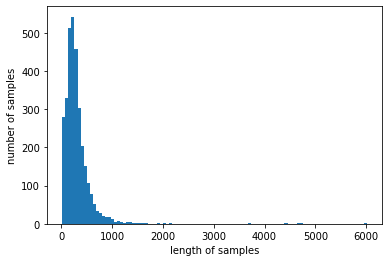

In [63]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [85]:
max_len = 350
x_train = pad_sequences(x_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
x_test = pad_sequences(x_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

In [87]:
print(x_train)

[[    0     0     0 ...  2554    34    50]
 [    0     0     0 ... 11126  1687   899]
 [ 1211   439   161 ... 12224    34    50]
 ...
 [    0     0     0 ...   658    42    19]
 [   14  7352    81 ...    50  1634   265]
 [    0     0     0 ...  2611    34    50]]


In [88]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [89]:
print(y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## 모델링

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [92]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [95]:
model = Sequential()
model.add(Embedding(vocab_size,64,input_length=max_len))
model.add(LSTM(128))
model.add(Dense(len(category), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=30, verbose=2, callbacks=[es, mc],validation_data=(x_test, y_test))

Epoch 1/30
100/100 - 46s - loss: 0.9109 - accuracy: 0.5489 - val_loss: 0.5913 - val_accuracy: 0.7491
Epoch 2/30
100/100 - 45s - loss: 0.4323 - accuracy: 0.8331 - val_loss: 0.4911 - val_accuracy: 0.8080
Epoch 3/30
100/100 - 44s - loss: 0.1779 - accuracy: 0.9445 - val_loss: 0.4830 - val_accuracy: 0.8331
Epoch 4/30
100/100 - 43s - loss: 0.0848 - accuracy: 0.9737 - val_loss: 0.5538 - val_accuracy: 0.8130
Epoch 5/30
100/100 - 43s - loss: 0.0419 - accuracy: 0.9896 - val_loss: 0.6588 - val_accuracy: 0.8018
Epoch 6/30
100/100 - 44s - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.6328 - val_accuracy: 0.8381
Epoch 7/30
100/100 - 43s - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.7305 - val_accuracy: 0.8105
Epoch 00007: early stopping


**구에엑 누가봐도 과적합! vocab_size를 줄이는 것이 좋을듯!**
